# N-gram Language Models

*In the following sections we will formalize the intuition of probabilistic language modeling by introducing models that assign a probability to each possible next word. The same models will also serve to assign a probability to an entire sentence.*

## Unigram Approach

*The Reuters Corpus contains 10,788 news documents totaling 1.3 million words.*

In [0]:
from nltk.corpus import reuters

In [0]:
from collections import Counter
# frequency counts of words
counts = Counter(reuters.words())
# total number of words
total_count = len(reuters.words())

In [4]:
# The most common 20 words are ...
print(counts.most_common(n=20))

[('.', 94687), (',', 72360), ('the', 58251), ('of', 35979), ('to', 34035), ('in', 26478), ('said', 25224), ('and', 25043), ('a', 23492), ('mln', 18037), ('vs', 14120), ('-', 13705), ('for', 12785), ('dlrs', 11730), ("'", 11272), ('The', 10968), ('000', 10277), ('1', 9977), ('s', 9298), ('pct', 9093)]


In [0]:
# Compute the frequencies of words
for word in counts:
    counts[word] /= float(total_count)

In [6]:
# The frequencies should add up to 1
print(sum(counts.values()))

1.0000000000006808


In [7]:
import random
# Generate 100 words of language
text = []
for _ in range(100):
    r = random.random()
    accumulator = .0
    for word, freq in counts.items():
        accumulator += freq
        if accumulator >= r:
            text.append(word)
            break
 
print(' '.join(text))

the expects 36 Chile enough s Net three It . Commission pct 000 pct she . gives " -- 6 remain > said . being 4 pct vs . aimed Harris service open 432 Ontario end three FORD it is subsidized DIVISION 1 but ; . stg visibly after 000 shares Avg Admin it lt week The ; the s EXPORTS time ' 1986 pursue of residents Gandhi next Nakasone has 1986 be order commercial 188 previously mln 4 State While said cts 2 000 is declined pct sparked EXPORTERS said & lead year on Kan said . and grain


*As you can see, it’s not the most expressive piece of content out there. The produced text follows only the frequency rules of the language and nothing more.*

In [8]:
# The probability of a text
from functools import reduce
from operator import mul
print(reduce(mul, [counts[w] for w in text], 1.0))

2.8020041277481604e-308


In [9]:
# Usage of reduce:
reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) # calculates ((((1+2)+3)+4)+5)

15

## Bigram Approach

*One idea that can help us generate better text is to make sure the new word we’re adding to the sequence goes well with the words already in the sequence. Checking if a word fits well after 10 words might be a bit overkill. We can simplify things to keep the problem reasonable. Let’s make sure the new word goes well after the last word in the sequence (bigram model) or the last two words (trigram model).*

In [0]:
from nltk import bigrams, trigrams
from collections import defaultdict

In [11]:
first_sentence = reuters.sents()[0]
print(first_sentence)

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']


In [12]:
# Get the bigrams
print(list(bigrams(first_sentence)))

[('ASIAN', 'EXPORTERS'), ('EXPORTERS', 'FEAR'), ('FEAR', 'DAMAGE'), ('DAMAGE', 'FROM'), ('FROM', 'U'), ('U', '.'), ('.', 'S'), ('S', '.-'), ('.-', 'JAPAN'), ('JAPAN', 'RIFT'), ('RIFT', 'Mounting'), ('Mounting', 'trade'), ('trade', 'friction'), ('friction', 'between'), ('between', 'the'), ('the', 'U'), ('U', '.'), ('.', 'S'), ('S', '.'), ('.', 'And'), ('And', 'Japan'), ('Japan', 'has'), ('has', 'raised'), ('raised', 'fears'), ('fears', 'among'), ('among', 'many'), ('many', 'of'), ('of', 'Asia'), ('Asia', "'"), ("'", 's'), ('s', 'exporting'), ('exporting', 'nations'), ('nations', 'that'), ('that', 'the'), ('the', 'row'), ('row', 'could'), ('could', 'inflict'), ('inflict', 'far'), ('far', '-'), ('-', 'reaching'), ('reaching', 'economic'), ('economic', 'damage'), ('damage', ','), (',', 'businessmen'), ('businessmen', 'and'), ('and', 'officials'), ('officials', 'said'), ('said', '.')]


In [13]:
# Get the padded bigrams
print(list(bigrams(first_sentence, pad_left=True, pad_right=True)))

[(None, 'ASIAN'), ('ASIAN', 'EXPORTERS'), ('EXPORTERS', 'FEAR'), ('FEAR', 'DAMAGE'), ('DAMAGE', 'FROM'), ('FROM', 'U'), ('U', '.'), ('.', 'S'), ('S', '.-'), ('.-', 'JAPAN'), ('JAPAN', 'RIFT'), ('RIFT', 'Mounting'), ('Mounting', 'trade'), ('trade', 'friction'), ('friction', 'between'), ('between', 'the'), ('the', 'U'), ('U', '.'), ('.', 'S'), ('S', '.'), ('.', 'And'), ('And', 'Japan'), ('Japan', 'has'), ('has', 'raised'), ('raised', 'fears'), ('fears', 'among'), ('among', 'many'), ('many', 'of'), ('of', 'Asia'), ('Asia', "'"), ("'", 's'), ('s', 'exporting'), ('exporting', 'nations'), ('nations', 'that'), ('that', 'the'), ('the', 'row'), ('row', 'could'), ('could', 'inflict'), ('inflict', 'far'), ('far', '-'), ('-', 'reaching'), ('reaching', 'economic'), ('economic', 'damage'), ('damage', ','), (',', 'businessmen'), ('businessmen', 'and'), ('and', 'officials'), ('officials', 'said'), ('said', '.'), ('.', None)]


**Now we are going to build  bigram model from the Reuters Corpus**

*The bigram model approximates the probability of a word given
all the previous words P(wnjwn 1−1) by using only the conditional probability of the
preceding word <i>P</i>(w<sub>n</sub> | w<sub>n−1</sub>)</i>.*

In [14]:
bigram_model = defaultdict(lambda: defaultdict(lambda: 0))
for sentence in reuters.sents():
    for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
        bigram_model[(w1)][w2] += 1
 
print(bigram_model["the"]["economists"])
print(bigram_model["the"]["nonexistingword"]) 
print(bigram_model[None]["The"]) 

8
0
8839


"economists" follows "the" 8 times

"nonexistingword" word follows "the" 0 times

8839 sentences start with "The"

In [0]:
# Let's transform the counts to probabilities
for w1 in bigram_model:
    total_count = float(sum(bigram_model[w1].values()))
    for w2 in bigram_model[w1]:
        bigram_model[w1][w2] /= total_count

In [16]:
print(bigram_model["the"]["economists"]) 
print(bigram_model["the"]["nonexistingword"]) 
print(bigram_model[None]["The"])

0.00013733669808243634
0.0
0.16154324146501936


## Trigram Approach

In [17]:
# Get the trigrams
print(list(trigrams(first_sentence)))

[('ASIAN', 'EXPORTERS', 'FEAR'), ('EXPORTERS', 'FEAR', 'DAMAGE'), ('FEAR', 'DAMAGE', 'FROM'), ('DAMAGE', 'FROM', 'U'), ('FROM', 'U', '.'), ('U', '.', 'S'), ('.', 'S', '.-'), ('S', '.-', 'JAPAN'), ('.-', 'JAPAN', 'RIFT'), ('JAPAN', 'RIFT', 'Mounting'), ('RIFT', 'Mounting', 'trade'), ('Mounting', 'trade', 'friction'), ('trade', 'friction', 'between'), ('friction', 'between', 'the'), ('between', 'the', 'U'), ('the', 'U', '.'), ('U', '.', 'S'), ('.', 'S', '.'), ('S', '.', 'And'), ('.', 'And', 'Japan'), ('And', 'Japan', 'has'), ('Japan', 'has', 'raised'), ('has', 'raised', 'fears'), ('raised', 'fears', 'among'), ('fears', 'among', 'many'), ('among', 'many', 'of'), ('many', 'of', 'Asia'), ('of', 'Asia', "'"), ('Asia', "'", 's'), ("'", 's', 'exporting'), ('s', 'exporting', 'nations'), ('exporting', 'nations', 'that'), ('nations', 'that', 'the'), ('that', 'the', 'row'), ('the', 'row', 'could'), ('row', 'could', 'inflict'), ('could', 'inflict', 'far'), ('inflict', 'far', '-'), ('far', '-', 'rea

In [18]:
# Get the padded trigrams
print(list(trigrams(first_sentence, pad_left=True, pad_right=True)))

[(None, None, 'ASIAN'), (None, 'ASIAN', 'EXPORTERS'), ('ASIAN', 'EXPORTERS', 'FEAR'), ('EXPORTERS', 'FEAR', 'DAMAGE'), ('FEAR', 'DAMAGE', 'FROM'), ('DAMAGE', 'FROM', 'U'), ('FROM', 'U', '.'), ('U', '.', 'S'), ('.', 'S', '.-'), ('S', '.-', 'JAPAN'), ('.-', 'JAPAN', 'RIFT'), ('JAPAN', 'RIFT', 'Mounting'), ('RIFT', 'Mounting', 'trade'), ('Mounting', 'trade', 'friction'), ('trade', 'friction', 'between'), ('friction', 'between', 'the'), ('between', 'the', 'U'), ('the', 'U', '.'), ('U', '.', 'S'), ('.', 'S', '.'), ('S', '.', 'And'), ('.', 'And', 'Japan'), ('And', 'Japan', 'has'), ('Japan', 'has', 'raised'), ('has', 'raised', 'fears'), ('raised', 'fears', 'among'), ('fears', 'among', 'many'), ('among', 'many', 'of'), ('many', 'of', 'Asia'), ('of', 'Asia', "'"), ('Asia', "'", 's'), ("'", 's', 'exporting'), ('s', 'exporting', 'nations'), ('exporting', 'nations', 'that'), ('nations', 'that', 'the'), ('that', 'the', 'row'), ('the', 'row', 'could'), ('row', 'could', 'inflict'), ('could', 'inflict

In [0]:
trigram_model = defaultdict(lambda: defaultdict(lambda: 0))
 
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        trigram_model[(w1, w2)][w3] += 1

In [20]:
print(trigram_model["what", "the"]["economists"]) # "economists" follows "what the" 2 times
print(trigram_model["what", "the"]["nonexistingword"]) # 0 times
print(trigram_model[None, None]["The"]) # 8839 sentences start with "The"

2
0
8839


"economists" follows "what the" 2 times

"nonexistingword" follows "what the" 0 times

8839 sentences start with "The"

In [0]:
# Let's transform the counts to probabilities
for w1_w2 in trigram_model:
    total_count = float(sum(trigram_model[w1_w2].values()))
    for w3 in trigram_model[w1_w2]:
        trigram_model[w1_w2][w3] /= total_count

In [22]:
print(trigram_model["what", "the"]["economists"])
print(trigram_model["what", "the"]["nonexistingword"])
print(trigram_model[None, None]["The"])

0.043478260869565216
0.0
0.16154324146501936


*Let’s generate some text using Trigram Model*

In [23]:
import random 
text = [None, None]
sentence_finished = False
while not sentence_finished:
    r = random.random()
    accumulator = .0
    for word in trigram_model[tuple(text[-2:])].keys():
        accumulator += trigram_model[tuple(text[-2:])][word]
        if accumulator >= r:
            text.append(word)
            break
    if text[-2:] == [None, None]:
        sentence_finished = True
 
print(' '.join([t for t in text if t]))

RETALIATION IN GULF The speaker of the nation ' s alleged failure to agree 1987 / 88 for the broad sterling M3 expanded by just under one percentage point gain , the officials said while the appeal made yesterday by May or July position will be held March Nine to holders of record April One , 1986 of 75 mln tonnes , the delegates said .


# Using NLTK Language Model API

(https://www.nltk.org/api/nltk.lm.html#module-nltk.lm.api)

In [0]:
from nltk.util import pad_sequence
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [0]:
from nltk.lm import MLE
model = MLE(3) # Lets train a 3-grams model

In [0]:
train_data= [list(trigrams(sentence)) for sentence in reuters.sents()]

In [0]:
model.fit(text= train_data, vocabulary_text= reuters.words())

In [28]:
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 41601 items>


In [29]:
model.counts["what", "the"]["economists"]

2

In [30]:
model.score("economists", ["what", "the"])

0.043478260869565216

*We always represent and compute language model probabilities in log format as log probabilities. Since probabilities are (by definition) less than or equal to
1, the more probabilities we multiply together, the smaller the product becomes.
Multiplying enough n-grams together would result in numerical underflow. By using log probabilities instead of raw probabilities, we get numbers that are not as small. Adding in log space is equivalent to multiplying in linear space, so we combine log probabilities by adding them.*

$p_1 × p_2 × p_3 × p_4 = exp(log \hspace{0.2cm} p_1 +log\hspace{0.2cm}p_2 +log\hspace{0.2cm} p_3 +log\hspace{0.2cm}p_4)$

In [31]:
model.logscore("economists", ["what", "the"])

-4.523561956057013

# Evaluating Language Models

In practice we don’t use raw probability as our metric for evaluating language models, but a variant called **perplexity**. The **perplexity** (sometimes called **PP** for short) of a language model on a test set is the inverse probability of the test set, normalized by the number of words.

For a test set $W = w_1, w_2 :::w_N$:


$ PP(W)= P(w_1, w_2 ... w_N)^-\frac{1}{N}$

$ \hspace{1.6cm} = \sqrt[N]{\frac{1}{P(w_1, w_2 ... w_N)}}$

In [32]:
len(train_data)

54716

In [33]:
test= train_data[:700]
model.perplexity(test)

inf

# Smoothing

*What do we do with words that are in our vocabulary (they are not unknown words) but appear in a test set in an unseen context (for example they appear after a word they never appeared after in training)? To keep a language model from assigning zero probability to these unseen events, we’ll have to shave off a bit of probability mass from some more frequent events and give it to the events we’ve never seen.*

## Laplace Smoothing

The simplest way to do smoothing is to add one to all the bigram counts, before
we normalize them into probabilities. All the counts that used to be zero will now have a count of 1, the counts of 1 will be 2, and so on. This algorithm is called **Laplace smoothing**.

$P_{Laplace}(w_i) = \frac{c_i + 1}{N + V} $

In [0]:
from nltk.lm.models import Laplace
smooth_model= Laplace(order= 3)

In [0]:
smooth_model.fit(train_data, vocabulary_text= reuters.words())

**Without Smoothing**

In [36]:
# Out of Vocabulary Word
model.score("economy", ["what", "the"])

0.0

**With Smoothing**

In [37]:
smooth_model.score("economy", ["what", "the"])

2.401133334934089e-05

### Laplace smoothing on our Unigram Model

In [0]:
from collections import Counter
# frequency counts of words
counts_smooth = Counter(reuters.words())
# total number of words
N = len(reuters.words())
# total number of unique words
V= len(counts_smooth)

In [39]:
len(counts_smooth), len(reuters.words())

(41600, 1720901)

In [0]:
# Compute the frequencies of words
for word in counts_smooth:
    counts_smooth[word]= (counts_smooth[word] + 1) / (N + V)

In [0]:
from random import sample
random_words= sample(list(counts.keys()), 30)

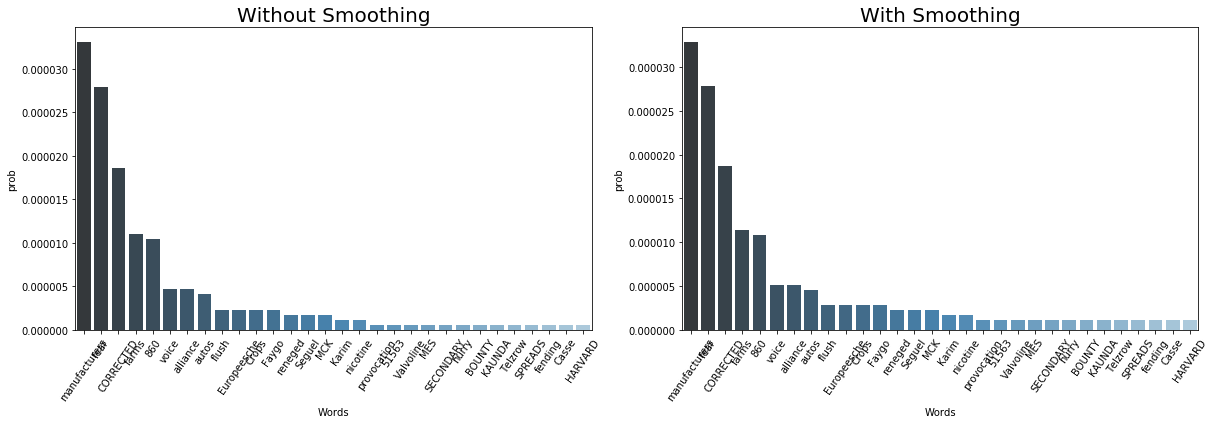

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize= (17, 6))
plt.subplot(1, 2, 1)
plt.title("Without Smoothing", fontsize= 20)
df_1= pd.DataFrame({'Words': random_words, 'prob':[counts[word] for word in random_words]})
df_1= df_1.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_1,  ci=None)
plt.xticks(rotation= 55)
plt.subplot(1, 2, 2)
plt.title("With Smoothing", fontsize= 20)
df_2= pd.DataFrame({'Words': random_words, 'prob':[counts_smooth[word] for word in random_words]})
df_2= df_2.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_2,  ci=None)
plt.xticks(rotation= 55)
plt.tight_layout()
plt.show()

## Lidstone Smoothing

$P_{Lidstone}(w_i) = \frac{c_i + \lambda}{N + \lambda* V} $

In [0]:
from nltk.lm.models import Lidstone
smooth_model= Lidstone(order= 3, gamma= 0.01)

In [0]:
smooth_model.fit(train_data, vocabulary_text= reuters.words())

**Without Smoothing**

In [45]:
# Out of Vocabulary Word
model.score("economy", ["what", "the"])

0.0

**With Smoothing**

In [46]:
smooth_model.score("economy", ["what", "the"])

2.1644553148200257e-05

### Lidstone Smoothing on our unigram model

In [0]:
# Splitting the Data into test/train
import random
data= list()
for sent in reuters.sents():
  data.append([tuple([word]) for word in sent])
random.seed(42)
random.shuffle(data)
train = data[:-5471]
test= data[-5471:]

In [48]:
len(train), len(test)

(49245, 5471)

In [0]:
from nltk.lm.models import Lidstone
model= Lidstone(order= 1, gamma= 0.01)

In [0]:
model.fit(train, vocabulary_text= list(reuters.words()))

In [51]:
model.perplexity(test)

41789.006166881605

**Tunning part 1 for the value of gamma**

In [0]:
gamma = [0.1, 0.01, 0.001, 0.0001, 0.00001]
per= []
for g in gamma:
  model= Lidstone(order= 1, gamma= g)
  model.fit(train, vocabulary_text= list(reuters.words()))
  per.append(model.perplexity(test))

In [67]:
per

[41736.331337841846,
 41789.006166881605,
 41841.79728706627,
 41894.660091779355,
 41947.59018337824]

*Based on this we can say that for gamma value 0.1 perplexity is lowest and thus the probability is higgh for 0.1*

**Tunning part 2 for the value of gamma**

In [0]:
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
per= []
for g in gamma:
  model= Lidstone(order= 1, gamma= g)
  model.fit(train, vocabulary_text= list(reuters.words()))
  per.append(model.perplexity(test))

In [69]:
per

[41736.331337841846,
 41720.532195416374,
 41711.3182813913,
 41704.79969242025,
 41699.75766533793,
 41695.64941613054]

So, We are going to use gamma as 0.6

*Now lets calculate Probabilities for using this gamma*

In [0]:
from collections import Counter
# frequency counts of words
counts_smooth = Counter(reuters.words())
# total number of words
N = len(reuters.words())
# total number of unique words
V= len(counts_smooth)

In [90]:
len(counts_smooth), len(reuters.words())

(41600, 1720901)

In [0]:
# Compute the frequencies of words
gamma= 0.6
for word in counts_smooth:
    counts_smooth[word]= (counts_smooth[word] + gamma) / (N + (V*gamma))

In [0]:
from random import sample
random_words= sample(list(counts.keys()), 30)

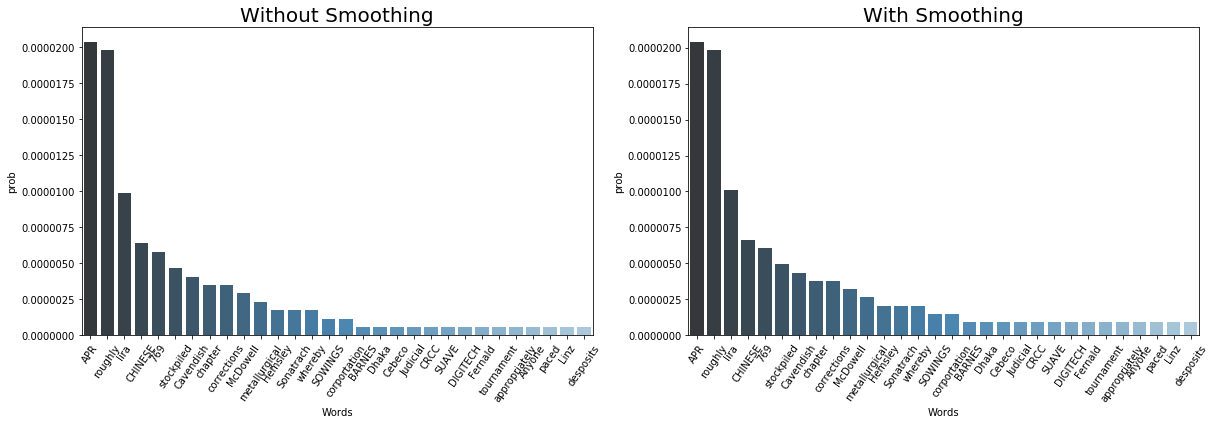

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize= (17, 6))
plt.subplot(1, 2, 1)
plt.title("Without Smoothing", fontsize= 20)
df_1= pd.DataFrame({'Words': random_words, 'prob':[counts[word] for word in random_words]})
df_1= df_1.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_1,  ci=None)
plt.xticks(rotation= 55)
plt.subplot(1, 2, 2)
plt.title("With Smoothing", fontsize= 20)
df_2= pd.DataFrame({'Words': random_words, 'prob':[counts_smooth[word] for word in random_words]})
df_2= df_2.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_2,  ci=None)
plt.xticks(rotation= 55)
plt.tight_layout()
plt.show()

## Back Off and Interpolation

### Simple Linear Interpolation

*In simple linear interpolation, we combine different order n-grams by linearly interpolating all the models. Thus, we estimate the trigram probability
by mixing together the unigram, bigram, and trigram probabilities, each weighted
by a λ<sub>i</sub>*

$\hat{p}(w_i\;|\;w_{i-2},w_{i-1})$

$= \lambda_1 \times p(w_i\;|\;w_{i-2},w_{i-1})$

$+ \lambda_2 \times p(w_i\;|\;w_{i-1})$

$+ \lambda_3 \times p(w_i)$

$\lambda_1 + \lambda_2 + \lambda_3 = 1$ 
 
$So, \lambda_1 = \lambda_2 = \lambda_3 = \frac{1}{3}$

For Example:

$\hat{p}(\textrm{economists | what, the})$

$= \frac{1}{3} \times p(\textrm{economists | what, the})$

$+ \frac{1}{3} \times p(\textrm{economists | the})$

$+ \frac{1}{3} \times p(\textrm{economists})$



In [0]:
lambda_i= 1/3

In [97]:
lambda_i * trigram_model["what", "the"]["economists"] + lambda_i * bigram_model["the"]["economists"] + lambda_i * counts["economists"]

0.014588118950433989

### Lambda Conditional On Context

$\hat{p}(w_i\;|\;w_{i-2},w_{i-1})$

$= {\lambda_1}(W_{i-2}^{i-1}) \times p(w_i\;|\;w_{i-2},w_{i-1})$

$+ \lambda_2(W_{i-2}^{i-1}) \times p(w_i\;|\;w_{i-1})$

$+ \lambda_3(W_{i-2}^{i-1}) \times p(w_i)$

**Kneser-Ney Smoothing**
One of the most commonly used and best performing n-gram smoothing methods is the interpolated Kneser-Ney algorithm

In [0]:
#Interpolated Model with Kneser-Ney Smoothing
from nltk.lm.smoothing import KneserNey
from nltk.lm.models import InterpolatedLanguageModel
model = InterpolatedLanguageModel(order= 3, smoothing_cls= KneserNey)

In [0]:
model.fit(text= train_data, vocabulary_text= reuters.words())

In [100]:
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 41601 items>


In [101]:
model.vocab

In [0]:
#Interpolated Model with WittenBell Smoothing
from nltk.lm.smoothing import WittenBell
from nltk.lm.models import InterpolatedLanguageModel
model = InterpolatedLanguageModel(order= 3, smoothing_cls= WittenBell)

In [0]:
model.fit(text= train_data, vocabulary_text= reuters.words())

In [104]:
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 41601 items>
